In [ ]:
"""
input:
    - data/processed/data_frames/precision_recall_threshold_curve_results.pkl
output:
    - figures/main_figure_svgs/figure1B.svg
    - figures/supp_figure_svgs/figure2.svg
"""

In [2]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
main_figures_path = "figures/main_figure_svgs"
supp_figures_path = "figures/supp_figure_svgs"
dataframes_path = "data/processed/data_frames"

with open(f"{dataframes_path}/precision_recall_threshold_curve_results.pkl", 'rb') as f:
    result_dict = pickle.load(f)

In [4]:
sns.set_context('poster')
colors = ["#f0be3d", "#04a3bd", "#931e18"]

In [5]:
neutral_auc = result_dict['precs_and_recs_auc']['neutral']
positive_auc = result_dict['precs_and_recs_auc']['positive']
negative_auc = result_dict['precs_and_recs_auc']['negative']

In [6]:
result_dict['precs_and_recs']

[[0.9920844327176781, 0.658493870402802],
 [0.9398907103825137, 0.8664987405541562],
 [0.8571428571428571, 0.6774193548387096]]

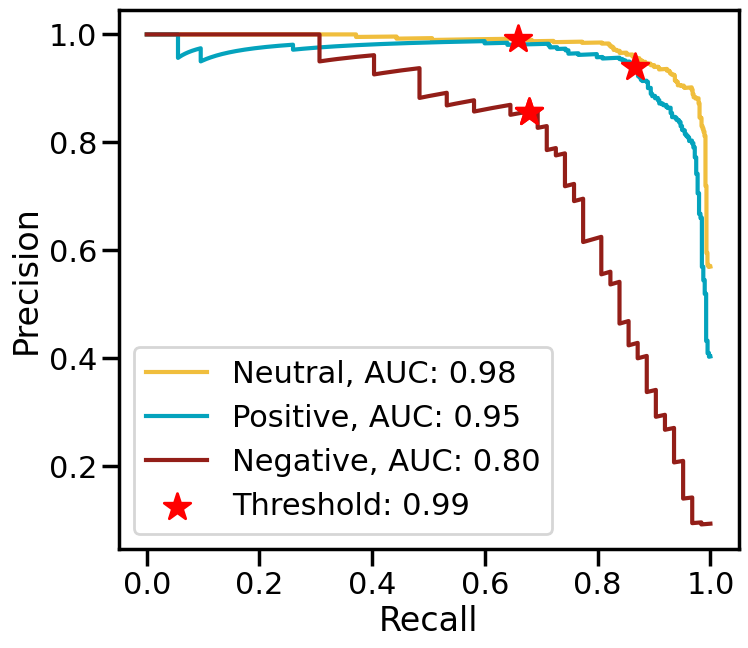

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(result_dict['recall']['neutral'], result_dict['precision']['neutral'],
        color=colors[0], label=f'Neutral, AUC: {neutral_auc:.2f}')
ax.plot(result_dict['recall']['positive'], result_dict['precision']['positive'],
        color=colors[1], label=f'Positive, AUC: {positive_auc:.2f}')
ax.plot(result_dict['recall']['negative'], result_dict['precision']['negative'],
        color=colors[2], label=f'Negative, AUC: {negative_auc:.2f}')

for pre, rec in result_dict['precs_and_recs']:
    ax.scatter(rec, pre, marker='*', s=400, color='red', zorder=3)

ax.scatter(rec, pre, marker='*', s=400, color='red', label='Threshold: 0.99')

ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.legend()

plt.savefig(f"{main_figures_path}/figure1B.svg", bbox_inches='tight')

### Precision-Cutoff Curve

In [8]:
neutral_prec = result_dict['precision']['neutral'][result_dict['threshold']['neutral'] >= 0.99][0]
positive_prec = result_dict['precision']['positive'][result_dict['threshold']['positive'] >= 0.99][0]
negative_prec = result_dict['precision']['negative'][result_dict['threshold']['negative'] >= 0.99][0]

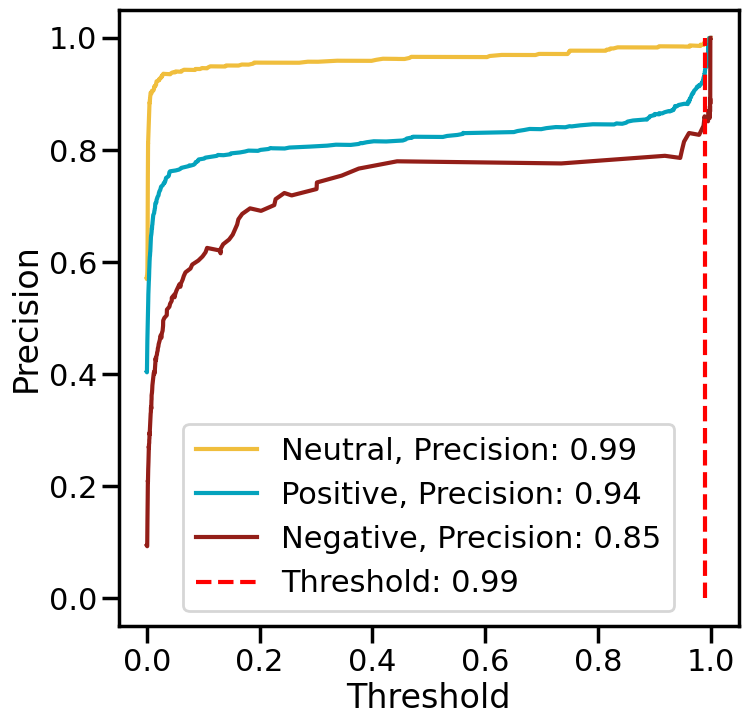

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(result_dict['threshold']['neutral'], result_dict['precision']['neutral'],
        color=colors[0], label=f'Neutral, Precision: {neutral_prec:.2f}')
ax.plot(result_dict['threshold']['positive'], result_dict['precision']['positive'],
        color=colors[1], label=f'Positive, Precision: {positive_prec:.2f}')
ax.plot(result_dict['threshold']['negative'], result_dict['precision']['negative'],
        color=colors[2], label=f'Negative, Precision: {negative_prec:.2f}')
ax.plot([0.99,0.99], [0,1], '--', color="red", label="Threshold: 0.99")

ax.set_ylabel('Precision')
ax.set_xlabel('Threshold')
plt.legend()

plt.savefig(f"{supp_figures_path}/figure2.svg", bbox_inches='tight')